Found 1918 images belonging to 3 classes.
Found 1918 images belonging to 3 classes.
Found 1918 images belonging to 3 classes.
Epoch 1/10
59/59 [==============================] - 748s 13s/step - loss: 0.5703 - accuracy: 0.7768 - val_loss: 0.1792 - val_accuracy: 0.9354
Epoch 2/10
59/59 [==============================] - 758s 13s/step - loss: 0.2092 - accuracy: 0.9284 - val_loss: 0.1233 - val_accuracy: 0.9539
Epoch 3/10
59/59 [==============================] - 748s 13s/step - loss: 0.1980 - accuracy: 0.9252 - val_loss: 0.0882 - val_accuracy: 0.9703
Epoch 4/10
59/59 [==============================] - 747s 13s/step - loss: 0.1533 - accuracy: 0.9396 - val_loss: 0.0697 - val_accuracy: 0.9793
Epoch 5/10
59/59 [==============================] - 1871s 32s/step - loss: 0.1170 - accuracy: 0.9560 - val_loss: 0.0530 - val_accuracy: 0.9825
Epoch 6/10
59/59 [==============================] - 740s 13s/step - loss: 0.1011 - accuracy: 0.9602 - val_loss: 0.0527 - val_accuracy: 0.9868
Epoch 7/10
59/59 [===

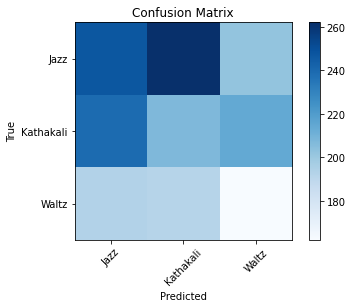

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define dataset paths
train_data_dir = 'data'
validation_data_dir = 'data'
test_data_dir = 'data'

# Image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load a pre-trained VGG16 model (without the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Create a custom top classification layer for 5 classes
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(3, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)

# Get the true labels from the test set
y_true = test_generator.classes

# Generate a classification report and confusion matrix
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_labels))
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [5]:
from tensorflow.keras.models import load_model
import os

In [6]:
model.save(os.path.join('models','imageclassifier.h5'))

In [11]:
# Later, when you want to load the model
model_path = os.path.join('models', 'imageclassifier.h5')
loaded_model = load_model(model_path)

In [13]:
# new_model = load_model('imageclassifier.h5')

In [14]:
# new_model.predict(np.expand_dims(resize/255, 0))

In [19]:
model.save("imageclassifier.h5")

In [24]:
# import os
# import numpy as np
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Load the saved model
# loaded_model = load_model('imageclassifier.h5')

# # Image dimensions
# img_width, img_height = 224, 224  # Set your desired image dimensions


# # Load an example image for prediction
# new_image_path = os.path.join('Test','waltz_test.JPG')  # Change to the path of your new image
# img = image.load_img(new_image_path, target_size=(img_width, img_height))
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = img / 255.0  # Normalize the pixel values

# new_image_datagen = ImageDataGenerator(rescale=1.0/255.0)
# # Load and preprocess the new image
# new_image_generator = new_image_datagen.flow_from_directory(
#     directory='',
#     classes=[''],  # You can leave these empty since there's only one image
#     target_size=(img_width, img_height),
#     batch_size=1,
#     class_mode=None,
#     shuffle=False
# )


# # Predict the class of the new image using the loaded model
# predicted_class = np.argmax(loaded_model.predict(new_image_generator), axis=-1)
# class_labels = list(test_generator.class_indices.keys())  # You can also use the class labels from your test set if they are the same
# predicted_class_name = class_labels[predicted_class[0]]

# # # Predict the class of the new image
# # predicted_class = np.argmax(model.predict(img), axis=-1)
# # class_labels = list(test_generator.class_indices.keys())
# # predicted_class_name = class_labels[predicted_class[0]]

# print(f'The predicted class for the new image is: {predicted_class_name}')

# # Visualize the new image
# plt.figure()
# plt.imshow(image.load_img(new_image_path))
# plt.title(f'Predicted Class: {predicted_class_name}')
# plt.show()

1/1 [==============================] - 4s 4s/step
The predicted class for the new image is: Kathakali


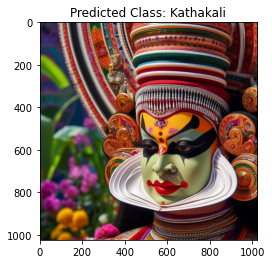

In [28]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = load_model('imageclassifier.h5')

# Image dimensions
img_width, img_height = 224, 224  # Set your desired image dimensions


# Load an example image for prediction
new_image_path = os.path.join('Test','_42c96ade-9081-4b53-8117-5bfcad9de8e3.JPG')  # Change to the path of your new image
img = image.load_img(new_image_path, target_size=(img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the pixel values


# Predict the class of the new image using the loaded model
predicted_class = np.argmax(loaded_model.predict(img), axis=-1)
class_labels = ['Jazz', 'Kathakali', 'Waltz']  # Replace with your class labels  # You can also use the class labels from your test set if they are the same
predicted_class_name = class_labels[predicted_class[0]]

print(f'The predicted class for the new image is: {predicted_class_name}')

# Visualize the new image
plt.figure()
plt.imshow(image.load_img(new_image_path))
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()

In [ ]:
# import os
# import uuid
# import urllib
# from flask import Flask, render_template, request
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# app = Flask(__name__)

# BASE_DIR = os.path.abspath(os.getcwd())
# model = load_model(os.path.join(BASE_DIR, 'models', 'imageclassifier.h5'))

# ALLOWED_EXT = set(['jpg', 'jpeg', 'png', 'jfif'])
# classes = ['Jazz', 'Kathakali', 'Waltz']  # Modify with your class names

# def allowed_file(filename):
#     return '.' in filename and filename.rsplit('.', 1)[1] in ALLOWED_EXT

# def predict(filename, model):
#     img = load_img(filename, target_size=(256, 256))  # Modify target size as per your model
#     img = img_to_array(img)
#     img = img.reshape(1, 256, 256, 3)  # Modify dimensions as per your model
#     img = img.astype('float32')
#     img = img / 255.0
#     result = model.predict(img)

#     dict_result = {}
#     for i in range(len(classes)):
#         dict_result[result[0][i]] = classes[i]

#     res = result[0]
#     res.sort()
#     res = res[::-1]
#     prob = res[:3]

#     prob_result = []
#     class_result = []
#     for i in range(3):
#         prob_result.append((prob[i] * 100).round(2))
#         class_result.append(dict_result[prob[i]])

#     return class_result, prob_result

# @app.route('/')
# def home():
#     return render_template("index.html")

# @app.route('/success', methods=['GET', 'POST'])
# def success():
#     error = ''
#     target_img = os.path.join(os.getcwd(), 'static/images')

#     if request.method == 'POST':
#         if request.form:
#             link = request.form.get('link')
#             try:
#                 resource = urllib.request.urlopen(link)
#                 unique_filename = str(uuid.uuid4())
#                 filename = unique_filename + ".jpg"
#                 img_path = os.path.join(target_img, filename)
#                 output = open(img_path, "wb")
#                 output.write(resource.read())
#                 output.close()
#                 img = filename

#                 class_result, prob_result = predict(img_path, model)

#                 predictions = {
#                     "class1": class_result[0],
#                     "class2": class_result[1],
#                     "class3": class_result[2],
#                     "prob1": prob_result[0],
#                     "prob2": prob_result[1],
#                     "prob3": prob_result[2],
#                 }

#             except Exception as e:
#                 print(str(e))
#                 error = 'This image from this site is not accessible or inappropriate input'

#             if len(error) == 0:
#                 return render_template('success.html', img=img, predictions=predictions)
#             else:
#                 return render_template('index.html', error=error)

#         elif request.files:
#             file = request.files['file']
#             if file and allowed_file(file.filename):
#                 file.save(os.path.join(target_img, file.filename))
#                 img_path = os.path.join(target_img, file.filename)
#                 img = file.filename

#                 class_result, prob_result = predict(img_path, model)

#                 predictions = {
#                     "class1": class_result[0],
#                     "class2": class_result[1],
#                     "class3": class_result[2],
#                     "prob1": prob_result[0],
#                     "prob2": prob_result[1],
#                     "prob3": prob_result[2],
#                 }

#             else:
#                 error = "Please upload images of jpg, jpeg, and png extension only"

#             if len(error) == 0:
#                 return render_template('success.html', img=img, predictions=predictions)
#             else:
#                 return render_template('index.html', error=error)

#     else:
#         return render_template('index.html')

# if __name__ == "__main__":
#     app.run(host="0.0.0.0", port=5000) 